<a href="https://colab.research.google.com/github/itsmeismaill/Segmentation-des-clients-pour-un-magasin-de-detail/blob/main/Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [120]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns


In [121]:
# Charger l'ensemble de données
data = pd.read_csv('donnees_clients.csv')
print(data[:10])

   ID client   âge     sexe  revenu annuel   score de dépenses
0          1    20     Male          20000                  35
1          2    35   Female          40000                  67
2          3    25   Female          32000                  52
3          4    30     Male          45000                  75
4          5    50     Male          70000                  82
5          6    45   Female          80000                  70
6          7    22     Male          25000                  40
7          8    28   Female          37000                  55
8          9    38   Female          55000                  73
9         10    42     Male          60000                  73


In [122]:
# Nettoyage des données
# Afficher le nombre de valeurs manquantes dans chaque colonne
missing_values = data.isnull().sum()
print("Nombre de valeurs manquantes dans chaque colonne :")
print(missing_values)

Nombre de valeurs manquantes dans chaque colonne :
ID client             0
 âge                  0
 sexe                 0
 revenu annuel        0
 score de dépenses    0
dtype: int64


In [123]:
#Supprimer les doublons s'il y en a
data.drop_duplicates(inplace=True)
# Supprimer les espaces blancs autour des valeurs de la colonne ' revenu annuel'
data[' revenu annuel'] = data[' revenu annuel'].str.strip()

# Convertir la colonne ' revenu annuel' en type numérique
data[' revenu annuel'] = pd.to_numeric(data[' revenu annuel'], errors='coerce')

# Supprimer les lignes avec des valeurs non numériques dans la colonne ' revenu annuel'
data.dropna(subset=[' revenu annuel'], inplace=True)

# Convertir 'Male' en 0 et 'Female' en 1 dans la colonne 'sexe'
data[' sexe'] = data[' sexe'].map({' Male': 0, ' Female': 1})
print(data.columns)
print(data)


Index(['ID client', ' âge', ' sexe', ' revenu annuel', ' score de dépenses'], dtype='object')
     ID client   âge   sexe   revenu annuel   score de dépenses
0            1    20      0         20000.0                  35
1            2    35      1         40000.0                  67
2            3    25      1         32000.0                  52
3            4    30      0         45000.0                  75
4            5    50      0         70000.0                  82
..         ...   ...    ...             ...                 ...
102        103    65      1        108000.0                  97
103        104    67      0        110000.0                  96
104        105    69      1        112000.0                  94
105        106    71      0        114000.0                  93
106        107    73      1        116000.0                  92

[106 rows x 5 columns]


In [124]:
# Traitement des valeurs aberrantes
data = data[data[' âge'] <= 100]

In [125]:
#Normaliser data
# Sélectionner les colonnes à normaliser
colonnes_a_normaliser = [' âge', ' revenu annuel', ' score de dépenses']
# Normaliser les données
scaler = MinMaxScaler()
data[colonnes_a_normaliser] = scaler.fit_transform(data[colonnes_a_normaliser])
print(data[:10])

   ID client     âge   sexe   revenu annuel   score de dépenses
0          1  0.0125      0        0.016129            0.072464
1          2  0.2000      1        0.177419            0.536232
2          3  0.0750      1        0.112903            0.318841
3          4  0.1375      0        0.217742            0.652174
4          5  0.3875      0        0.419355            0.753623
5          6  0.3250      1        0.500000            0.579710
6          7  0.0375      0        0.056452            0.144928
7          8  0.1125      1        0.153226            0.362319
8          9  0.2375      1        0.298387            0.623188
9         10  0.2875      0        0.338710            0.623188


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

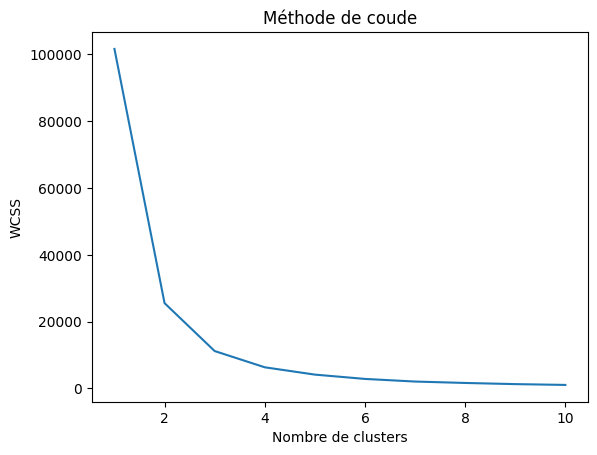

In [126]:
# Recherche du nombre optimal de clusters en utilisant la méthode de coude
wcss = []  # Within-Cluster Sum of Squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

# Tracer le graphique de la méthode de coude
plt.plot(range(1, 11), wcss)
plt.title('Méthode de coude')
plt.xlabel('Nombre de clusters')
plt.ylabel('WCSS')
plt.show()

In [127]:
# Utiliser K-Means avec le nombre optimal de clusters
nombre_clusters = 3
kmeans = KMeans(n_clusters=nombre_clusters, init='k-means++', random_state=42)
data['cluster'] = kmeans.fit_predict(data)

# Afficher les centres des clusters
print("Centres des clusters:")
print(kmeans.cluster_centers_)

# Afficher les données avec les clusters assignés
print("Données avec les clusters assignés:")
print(data.head())

Centres des clusters:
[[54.5         0.50520833  0.5         0.56742832  0.66586151]
 [90.          0.30892857  0.51428571  0.39262673  0.65258799]
 [18.11428571  0.24535714  0.48571429  0.31359447  0.58467909]]
Données avec les clusters assignés:
   ID client     âge   sexe   revenu annuel   score de dépenses  cluster
0          1  0.0125      0        0.016129            0.072464        2
1          2  0.2000      1        0.177419            0.536232        2
2          3  0.0750      1        0.112903            0.318841        2
3          4  0.1375      0        0.217742            0.652174        2
4          5  0.3875      0        0.419355            0.753623        2


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


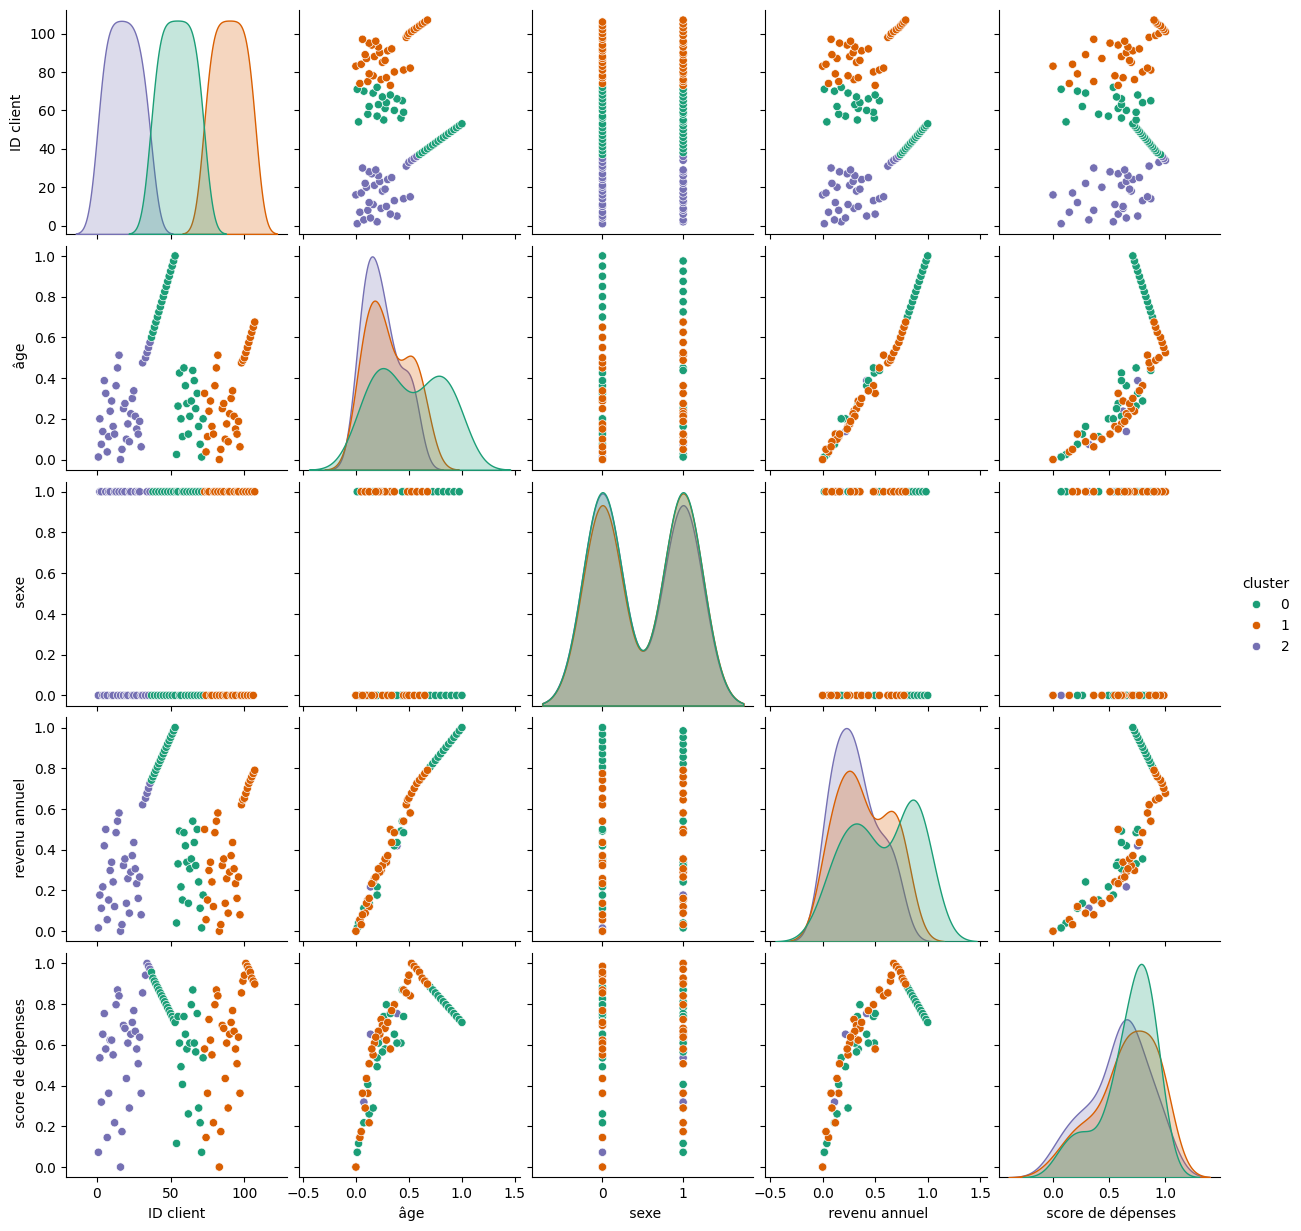

Moyennes des caractéristiques par cluster:
         ID client       âge      sexe   revenu annuel   score de dépenses
cluster                                                                   
0        54.500000  0.505208  0.500000        0.567428            0.665862
1        90.000000  0.308929  0.514286        0.392627            0.652588
2        18.114286  0.245357  0.485714        0.313594            0.584679


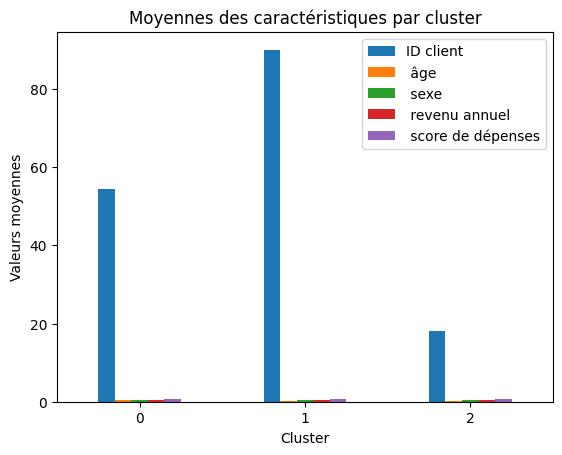

In [128]:
# Visualisation des clusters
# Exemple de visualisation des clusters en utilisant des graphiques de dispersion
sns.pairplot(data, hue='cluster', palette='Dark2', diag_kind='kde')
plt.show()

# Interprétation des caractéristiques des clusters
# Calculer les moyennes des caractéristiques par cluster
cluster_means = data.groupby('cluster').mean()
print("Moyennes des caractéristiques par cluster:")
print(cluster_means)

# Vous pouvez également visualiser les moyennes des caractéristiques par cluster sous forme de graphique
cluster_means.plot(kind='bar')
plt.title('Moyennes des caractéristiques par cluster')
plt.xlabel('Cluster')
plt.ylabel('Valeurs moyennes')
plt.xticks(rotation=0)
plt.show()